# Dataset (Train) Analysis

## Importing libraries and loading Train Set

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import statistics, math, copy
from mpl_toolkits import mplot3d

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, f1_score

train = pd.read_csv('./mobile-price-classification/train.csv')
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


## Class Labels and Number of Instances per Class

In [2]:
price_range = np.unique(train['price_range'])
print(f"Classes (Response Variables) = {price_range}\nNumber od Classes : {len(price_range)}")

Classes (Response Variables) = [0 1 2 3]
Number od Classes : 4


## Checking for Dataset Imbalance and NaN entries

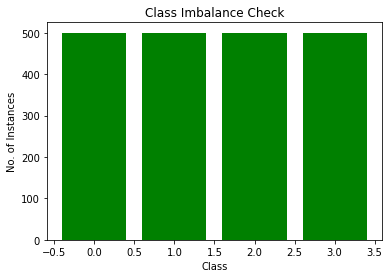

Class Labels : [1, 2, 3, 0]
No. of Inst. : [500, 500, 500, 500]

Total number of features : 20


In [3]:
instances_per_class = defaultdict(int)

for i in range(len(train)):
    instances_per_class[train['price_range'][i]] += 1

plt.bar(price_range, instances_per_class.values(), color='green')
plt.xlabel('Class')
plt.ylabel('No. of Instances')
plt.title('Class Imbalance Check')
plt.show()

print(f"Class Labels : {list(instances_per_class.keys())}\nNo. of Inst. : {list(instances_per_class.values())}\n\nTotal number of features : {len(train.columns)-1}")

In [4]:
for i in train.columns :
    num_nan = train[i].isnull().sum()
    if num_nan > 0:
        print(f"{i} column has {num_nan} NaN values")

## Normalizing data

In [5]:
"""scaler = StandardScaler().fit(train)
#scaler = MinMaxScaler().fit(train)
train_scaled = scaler.transform(train)

for i in range(len(train.columns)-1) :
    train[train.columns[i]] = train_scaled[:, i]

result = train.describe()
result.to_csv('mobile-price-classification-EDA.csv')
"""

"scaler = StandardScaler().fit(train)\n#scaler = MinMaxScaler().fit(train)\ntrain_scaled = scaler.transform(train)\n\nfor i in range(len(train.columns)-1) :\n    train[train.columns[i]] = train_scaled[:, i]\n\nresult = train.describe()\nresult.to_csv('mobile-price-classification-EDA.csv')\n"

## Categorical Feature-wise Instances per Class

In [6]:
categorical_features = []
for i in train.columns:
    if i == 'price_range':
        break
    if len(np.unique(train[i])) < 5:
        categorical_features.append(i)

print(f"Categorical Features : {categorical_features}")

cross_tables = []
for i in categorical_features:
    cross_tables.append(pd.crosstab(train[i], train['price_range']))

Categorical Features : ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


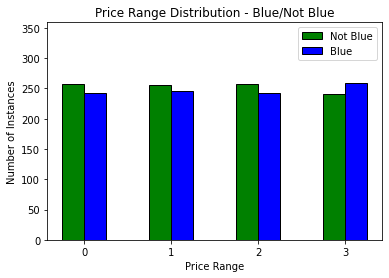

In [7]:
width = 0.25
plt.bar(np.arange(0, 4), cross_tables[0].loc[0], color='green', width=width, edgecolor='black', label='Not Blue')
plt.bar(np.arange(0, 4)+width, cross_tables[0].loc[1], width=width, color='blue', edgecolor='black', label='Blue')
plt.xticks(np.arange(0, 4) + width/2, price_range)
plt.xlabel('Price Range')
plt.ylabel('Number of Instances')
plt.ylim([0, max(list(cross_tables[0].loc[0])+list(cross_tables[0].loc[1]))+100])
plt.legend()
plt.title('Price Range Distribution - Blue/Not Blue')
plt.show()

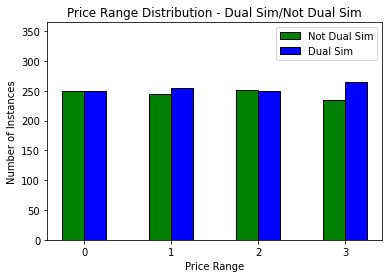

In [8]:
width = 0.25
plt.bar(np.arange(0, 4), cross_tables[1].loc[0], color='green', width=width, edgecolor='black', label='Not Dual Sim')
plt.bar(np.arange(0, 4)+width, cross_tables[1].loc[1], width=width, color='blue', edgecolor='black', label='Dual Sim')
plt.xticks(np.arange(0, 4) + width/2, price_range)
plt.xlabel('Price Range')
plt.ylabel('Number of Instances')
plt.ylim([0, max(list(cross_tables[1].loc[0])+list(cross_tables[1].loc[1]))+100])
plt.legend()
plt.title('Price Range Distribution - Dual Sim/Not Dual Sim')
plt.show()

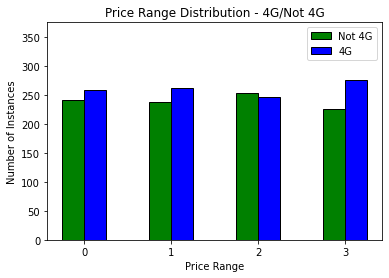

In [9]:
width = 0.25
plt.bar(np.arange(0, 4), cross_tables[2].loc[0], color='green', width=width, edgecolor='black', label='Not 4G')
plt.bar(np.arange(0, 4)+width, cross_tables[2].loc[1], width=width, color='blue', edgecolor='black', label='4G')
plt.xticks(np.arange(0, 4) + width/2, price_range)
plt.xlabel('Price Range')
plt.ylabel('Number of Instances')
plt.ylim([0, max(list(cross_tables[2].loc[0])+list(cross_tables[2].loc[1]))+100])
plt.legend()
plt.title('Price Range Distribution - 4G/Not 4G')
plt.show()

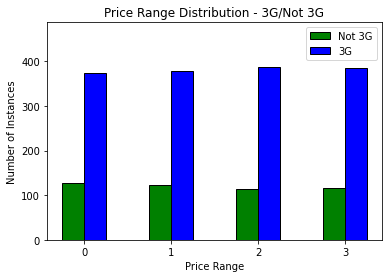

In [10]:
width = 0.25
plt.bar(np.arange(0, 4), cross_tables[3].loc[0], color='green', width=width, edgecolor='black', label='Not 3G')
plt.bar(np.arange(0, 4)+width, cross_tables[3].loc[1], width=width, color='blue', edgecolor='black', label='3G')
plt.xticks(np.arange(0, 4) + width/2, price_range)
plt.xlabel('Price Range')
plt.ylabel('Number of Instances')
plt.ylim([0, max(list(cross_tables[3].loc[0])+list(cross_tables[3].loc[1]))+100])
plt.legend()
plt.title('Price Range Distribution - 3G/Not 3G')
plt.show()

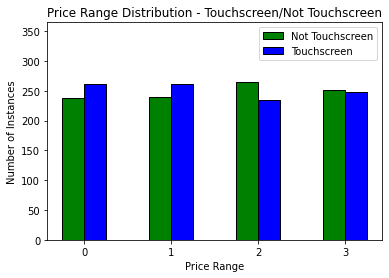

In [11]:
width = 0.25
plt.bar(np.arange(0, 4), cross_tables[4].loc[0], color='green', width=width, edgecolor='black', label='Not Touchscreen')
plt.bar(np.arange(0, 4)+width, cross_tables[4].loc[1], width=width, color='blue', edgecolor='black', label='Touchscreen')
plt.xticks(np.arange(0, 4) + width/2, price_range)
plt.xlabel('Price Range')
plt.ylabel('Number of Instances')
plt.ylim([0, max(list(cross_tables[4].loc[0])+list(cross_tables[4].loc[1]))+100])
plt.legend()
plt.title('Price Range Distribution - Touchscreen/Not Touchscreen')
plt.show()

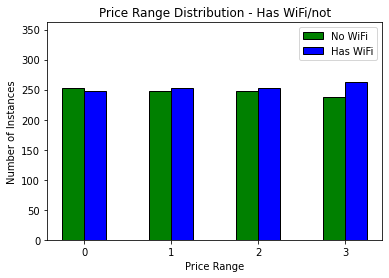

In [12]:
width = 0.25
plt.bar(np.arange(0, 4), cross_tables[5].loc[0], color='green', width=width, edgecolor='black', label='No WiFi')
plt.bar(np.arange(0, 4)+width, cross_tables[5].loc[1], width=width, color='blue', edgecolor='black', label='Has WiFi')
plt.xticks(np.arange(0, 4) + width/2, price_range)
plt.xlabel('Price Range')
plt.ylabel('Number of Instances')
plt.ylim([0, max(list(cross_tables[5].loc[0])+list(cross_tables[5].loc[1]))+100])
plt.legend()
plt.title('Price Range Distribution - Has WiFi/not')
plt.show()

## Data Visualization after PCA (Checking for linear separability)

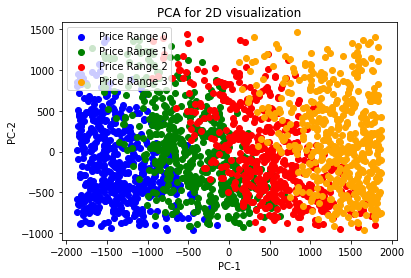

In [13]:
from sklearn.decomposition import PCA
X = np.array([np.asarray(train.loc[i][:-1]) for i in range(len(train))])
y = np.array(train['price_range'])

X_pca = PCA(n_components=2).fit_transform(X)

x0 = []
x1 = []
x2 = []
x3 = []
for i in range(len(y)):
    if y[i]==0:
        x0.append(X_pca[i])
    elif y[i]==1:
        x1.append(X_pca[i])
    elif y[i]==2:
        x2.append(X_pca[i])
    else:
        x3.append(X_pca[i])

x0 = np.array(x0)
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)

plt.scatter(x0[:,0], x0[:,1], color='blue', label='Price Range 0')
plt.scatter(x1[:,0], x1[:,1], color='green', label='Price Range 1')
plt.scatter(x2[:,0], x2[:,1], color='red', label='Price Range 2')
plt.scatter(x3[:,0], x3[:,1], color='orange', label='Price Range 3')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.title('PCA for 2D visualization')
plt.show()

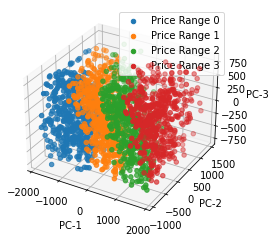

In [14]:
X = np.array([np.asarray(train.loc[i][:-1]) for i in range(len(train))])
y = np.array(train['price_range'])

pca = PCA(n_components=3).fit(X)
X_pca = pca.transform(X)
x0 = []
x1 = []
x2 = []
x3 = []
for i in range(len(y)):
    if y[i]==0:
        x0.append(X_pca[i])
    elif y[i]==1:
        x1.append(X_pca[i])
    elif y[i]==2:
        x2.append(X_pca[i])
    else:
        x3.append(X_pca[i])
x0 = np.array(x0)
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x0[:,0], x0[:,1], x0[:,2], cmap='Blues')
ax.scatter3D(x1[:,0], x1[:,1], x1[:,2], cmap='Reds')
ax.scatter3D(x2[:,0], x2[:,1], x2[:,2], cmap='Greens')
ax.scatter3D(x3[:,0], x3[:,1], x3[:,2], cmap='Oranges')
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')
plt.legend(['Price Range 0', 'Price Range 1', 'Price Range 2', 'Price Range 3'])
plt.show()

# Data Preprocessing and Splitting

In [15]:
enc = LabelBinarizer()
y_onehot = enc.fit_transform(y)

In [16]:
split = 0.8
random_permutation = np.random.permutation(len(X))
train_size = math.ceil(len(X)*split)
test_size = math.ceil(len(X)*(1-split))

X_train = []
y_train = []
y_train_onehot = []
X_val = []
y_val = []
y_val_onehot = []

for i in random_permutation[:train_size]:
    X_train.append(X[i])
    y_train.append(y[i])
    y_train_onehot.append(y_onehot[i])
for i in random_permutation[train_size:train_size+test_size]:
    X_val.append(X[i])
    y_val.append(y[i])
    y_val_onehot.append(y_onehot[i])

print(f"Train size : {len(X_train)}\tValidation size : {len(X_val)}")

Train size : 1600	Validation size : 400


# Model Selection

In [17]:
ALL_MODELS = []

## Kernel SVM

In [18]:
from sklearn.svm import SVC

C = [0.001, 0.01, 0.1, 1, 10, 100]

best_model = {'C' : 0, 'acc' : 0, 'f1' : 0, 'model' : None}
for c in C:
    model = SVC(C=c, kernel='poly')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_true=y_val, y_pred=y_pred)
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
    if best_model['f1'] < f1:
        best_model = {'C' : c, 'acc' : acc, 'f1' : f1, 'model' : copy.deepcopy(model)}

ALL_MODELS.append(copy.deepcopy(best_model))
y_pred = best_model['model'].predict(X_val)
print(f"Best Model based on Validation Accuracy : {best_model}\nValidation Accuracy : {accuracy_score(y_true=y_val, y_pred=y_pred)}\nTest F1-Score : {f1_score(y_true=y_val, y_pred=y_pred, average='weighted')}")

Best Model based on Validation Accuracy : {'C': 10, 'acc': 0.97, 'f1': 0.969927807486631, 'model': SVC(C=10, kernel='poly')}
Validation Accuracy : 0.97
Test F1-Score : 0.969927807486631


## Linear SVM

In [19]:
from sklearn.svm import LinearSVC

C = [0.001, 0.01, 0.1, 1, 10, 100]

best_model = {'C' : 0, 'acc' : 0, 'f1' : 0, 'model' : None}
for c in C:
    model = LinearSVC(C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_true=y_val, y_pred=y_pred)
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
    if best_model['f1'] < f1:
        best_model = {'C' : c, 'acc' : acc, 'f1' : f1, 'model' : copy.deepcopy(model)}

ALL_MODELS.append(copy.deepcopy(best_model))
y_pred = best_model['model'].predict(X_val)
print(f"Best Model based on Validation Accuracy : {best_model}\nTest Accuracy : {accuracy_score(y_true=y_val, y_pred=y_pred)}\nTest F1-Score : {f1_score(y_true=y_val, y_pred=y_pred, average='weighted')}")

c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Model based on Validation Accuracy : {'C': 100, 'acc': 0.54, 'f1': 0.44339465758427965, 'model': LinearSVC(C=100)}
Test Accuracy : 0.54
Test F1-Score : 0.44339465758427965


c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

best_model = {'depth' : 0, 'acc' : 0, 'f1' : 0, 'model' : None}
for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_true=y_val, y_pred=model.predict(X_val))
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')

    if best_model['f1'] < f1:
        best_model = {'depth' : i, 'acc' : acc, 'f1' : f1, 'model' : copy.deepcopy(model)}

ALL_MODELS.append(copy.deepcopy(best_model))
y_pred = best_model['model'].predict(X_val)
print(f"Best Model based on Validation Accuracy : {best_model}\nTest Accuracy : {accuracy_score(y_true=y_val, y_pred=y_pred)}\nTest F1-Score : {f1_score(y_true=y_val, y_pred=y_pred, average='weighted')}")

Best Model based on Validation Accuracy : {'depth': 5, 'acc': 0.8475, 'f1': 0.8469684254638612, 'model': DecisionTreeClassifier(max_depth=5)}
Test Accuracy : 0.8475
Test F1-Score : 0.8469684254638612


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [i for i in range(20, 151, 5)]
max_depth = [i for i in range(1, 21)]

best_model = {'max_depth' : 0, 'n_estimator' : 0, 'model' : None, 'acc' : 0, 'f1' : 0}
for estimator in n_estimators:
    for depth in max_depth:
        model = RandomForestClassifier(max_depth=depth, n_estimators=estimator)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
        if f1 > best_model['f1']:
            best_model['f1'] = f1
            best_model['acc'] = model.score(X_val, y_val)
            best_model['max_depth'] = depth
            best_model['n_estimator'] = estimator
            best_model['model'] = copy.deepcopy(model)

ALL_MODELS.append(copy.deepcopy(best_model))
y_pred = best_model['model'].predict(X_val)
print(f"Best Model based on Mean Validation Accuracy : {best_model}\nTest Accuracy : {accuracy_score(y_true=y_val, y_pred=y_pred)}\nTest F1-Score : {f1_score(y_true=y_val, y_pred=y_pred, average='weighted')}")

Best Model based on Mean Validation Accuracy : {'max_depth': 20, 'n_estimator': 120, 'model': RandomForestClassifier(max_depth=20, n_estimators=120), 'acc': 0.8975, 'f1': 0.8959131160195203}
Test Accuracy : 0.8975
Test F1-Score : 0.8959131160195203


# Prediction of Test Set

In [22]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import math, copy

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, f1_score

test = pd.read_csv('./mobile-price-classification/test.csv')
test.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [23]:
best_model_f1 = 0
for model in ALL_MODELS:
    if model['f1'] > best_model_f1:
        best_model = copy.deepcopy(model)
        best_model_f1 = model['f1']

best_model

{'C': 10,
 'acc': 0.97,
 'f1': 0.969927807486631,
 'model': SVC(C=10, kernel='poly')}

In [24]:
try:
    test = test.drop('id', axis=1)
except:
    pass
y_pred = best_model['model'].predict(np.array(test))

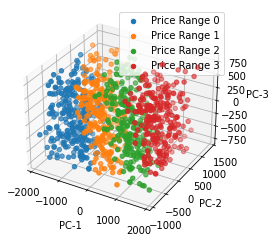

In [25]:
X = np.array([np.asarray(test.loc[i]) for i in range(len(test))])

X_pca = pca.transform(X)
x0 = []
x1 = []
x2 = []
x3 = []
for i in range(len(y_pred)):
    if y_pred[i]==0:
        x0.append(X_pca[i])
    elif y_pred[i]==1:
        x1.append(X_pca[i])
    elif y_pred[i]==2:
        x2.append(X_pca[i])
    else:
        x3.append(X_pca[i])
x0 = np.array(x0)
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x0[:,0], x0[:,1], x0[:,2], cmap='Blues')
ax.scatter3D(x1[:,0], x1[:,1], x1[:,2], cmap='Reds')
ax.scatter3D(x2[:,0], x2[:,1], x2[:,2], cmap='Greens')
ax.scatter3D(x3[:,0], x3[:,1], x3[:,2], cmap='Oranges')
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')
plt.legend(['Price Range 0', 'Price Range 1', 'Price Range 2', 'Price Range 3'])
plt.show()